<a href="https://colab.research.google.com/github/ashen-pabasara/fabric-defect-detection/blob/main/model_train_yolo_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuration**

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted successfully!")

Mounted at /content/drive
Google Drive mounted successfully!


In [ ]:
# Install ultralytics
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00


In [ ]:
# Folder path to zip file on Google Drive
zip_path = '/content/drive/My Drive/EEY9536 Data Science Project/Dataset/fabric_dataset.zip'

# Define unzip dir
unzip_destination = '/content/'

print(f"Starting to unzip {zip_path} to {unzip_destination}...")

# Run the unzip command
!unzip -q "{zip_path}" -d "{unzip_destination}"

print("Dataset unzipped successfully to /content/fabric_dataset/")

Starting to unzip /content/drive/My Drive/EEY9536 Data Science Project/Dataset/fabric_dataset.zip to /content/...
Dataset unzipped successfully to /content/fabric_dataset/


# **Balance Dataset**

In [ ]:
import os
import shutil
import glob
from tqdm import tqdm

# --- Configuration ---
# Path to your TRAINING data
TRAIN_IMG_DIR = '/content/fabric_dataset/images/train'
TRAIN_LBL_DIR = '/content/fabric_dataset/labels/train'

def get_file_classification():
    """Separates files into 'Normal' and 'Defect' lists"""
    normal_files = []
    defect_files = []

    # Get all .txt files
    label_files = glob.glob(os.path.join(TRAIN_LBL_DIR, "*.txt"))

    for lbl_path in label_files:
        filename = os.path.basename(lbl_path)
        image_name = filename.replace('.txt', '.jpg')
        image_path = os.path.join(TRAIN_IMG_DIR, image_name)

        # Check if image exists (sanity check)
        if not os.path.exists(image_path):
            continue

        # Check if label file is empty (Normal) or has content (Defect)
        if os.path.getsize(lbl_path) > 0:
            defect_files.append((image_path, lbl_path))
        else:
            normal_files.append((image_path, lbl_path))

    return normal_files, defect_files

# 1. Analyze Current Balance
print("Analyzing dataset balance...")
normal_imgs, defect_imgs = get_file_classification()

num_normal = len(normal_imgs)
num_defect = len(defect_imgs)

print(f"Normal Images: {num_normal}")
print(f"Defect Images: {num_defect}")

if num_defect >= num_normal:
    print("Dataset is already balanced (or defects are majority). No action needed.")
else:
    # 2. Calculate how many to create
    diff = num_normal - num_defect
    print(f"\nImbalance detected! Creating {diff} copies of defect images to match normal...")

    # 3. Create Copies
    import random

    # We loop until we have created enough copies
    count = 0
    pbar = tqdm(total=diff, desc="Oversampling")

    while count < diff:
        # Pick a random defect to copy
        img_src, lbl_src = random.choice(defect_imgs)

        # Create new unique filenames
        base_name = os.path.basename(img_src).replace('.jpg', '')
        new_name = f"{base_name}_copy_{count}"

        new_img_path = os.path.join(TRAIN_IMG_DIR, new_name + ".jpg")
        new_lbl_path = os.path.join(TRAIN_LBL_DIR, new_name + ".txt")

        # Copy the files
        shutil.copy(img_src, new_img_path)
        shutil.copy(lbl_src, new_lbl_path)

        count += 1
        pbar.update(1)

    pbar.close()
    print("\n✅ Balancing Complete! Your training set is now 50/50.")

Analyzing dataset balance...
Normal Images: 5859
Defect Images: 1969

Imbalance detected! Creating 3890 copies of defect images to match normal...


Oversampling: 100%|██████████| 3890/3890 [00:01<00:00, 1991.34it/s]


✅ Balancing Complete! Your training set is now 50/50.


In [ ]:


# --- Configuration ---
# Path to your TRAINING labels
LABEL_DIR = '/content/fabric_dataset/labels/train'

def count_classes():
    normal_count = 0
    defect_count = 0

    # Get all .txt files
    label_files = glob.glob(os.path.join(LABEL_DIR, "*.txt"))

    print(f"Scanning {len(label_files)} files in {LABEL_DIR}...\n")

    for lbl_path in label_files:
        # Check if file has content (Defect) or is empty (Normal)
        if os.path.getsize(lbl_path) > 0:
            defect_count += 1
        else:
            normal_count += 1

    return normal_count, defect_count

# Run the count
n_count, d_count = count_classes()

print("-" * 30)
print(f"FINAL DATASET BALANCE")
print("-" * 30)
print(f"Normal Samples:  {n_count}")
print(f"Defect Samples:  {d_count}")
print("-" * 30)
print(f"Total Images:    {n_count + d_count}")

# Check ratio
if n_count > 0:
    ratio = d_count / n_count
    print(f"Defect/Normal Ratio: {ratio:.2f}")
    if 0.95 <= ratio <= 1.05:
        print("RESULT: Perfect Balance! (Approx 1:1)")
    else:
        print("RESULT: Still slightly imbalanced (Check your oversampling script)")

Scanning 11718 files in /content/fabric_dataset/labels/train...

------------------------------
FINAL DATASET BALANCE
------------------------------
Normal Samples:  5859
Defect Samples:  5859
------------------------------
Total Images:    11718
Defect/Normal Ratio: 1.00
RESULT: Perfect Balance! (Approx 1:1)


In [ ]:
import yaml

# Define dataset path
correct_colab_path = '/content/fabric_dataset'

# Define the class names
class_names = { 0: "Defect" }

# reate the correct data dictionary
data_yaml = {
    'path': correct_colab_path,  # Use the correct Colab path
    'train': 'images/train',     # Relative path
    'val': 'images/val',         # Relative path
    'names': class_names
}

# Define the .yaml file path
yaml_file_path = '/content/fabric_dataset/fabric_data.yaml'

# Write YAML file
with open(yaml_file_path, 'w') as f:
    yaml.dump(data_yaml, f, sort_keys=False)

print(f"Successfully created a new, correct {yaml_file_path} with Linux paths.")
print("\n--- New YAML File Content ---")
print(yaml.dump(data_yaml, sort_keys=False))

Successfully created a new, correct /content/fabric_dataset/fabric_data.yaml with Linux paths.

--- New YAML File Content ---
path: /content/fabric_dataset
train: images/train
val: images/val
names:
  0: Defect



# **Model Training YOLOv8n**

In [ ]:
# @title
from ultralytics import YOLO

# Path to YAML file
yaml_path = '/content/fabric_dataset/fabric_data.yaml'

# Load the model
model = YOLO('yolov8n.pt')

# Start training
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=512,
    batch=64,
    name='yolov8n_colab_run_b64'
)

print("Training complete!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fabric_dataset/fabric_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=

# **Visualization**

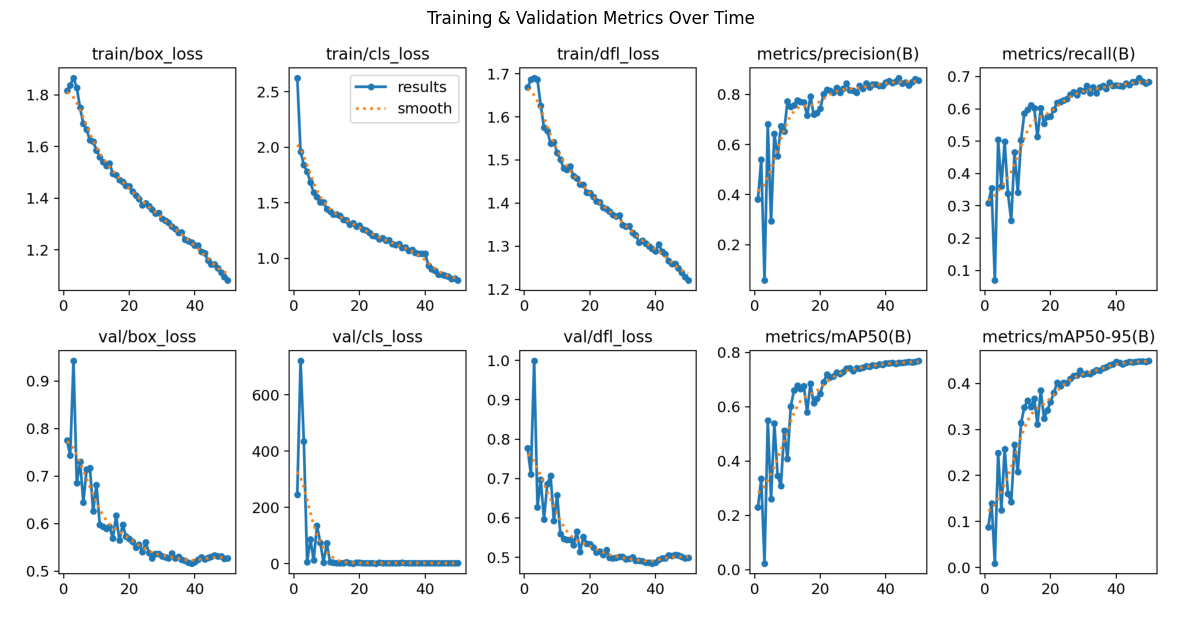

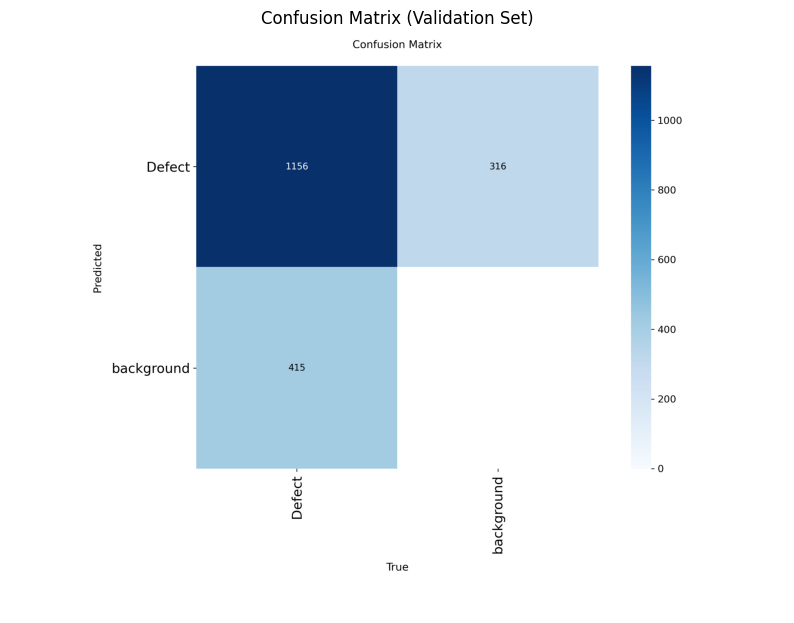

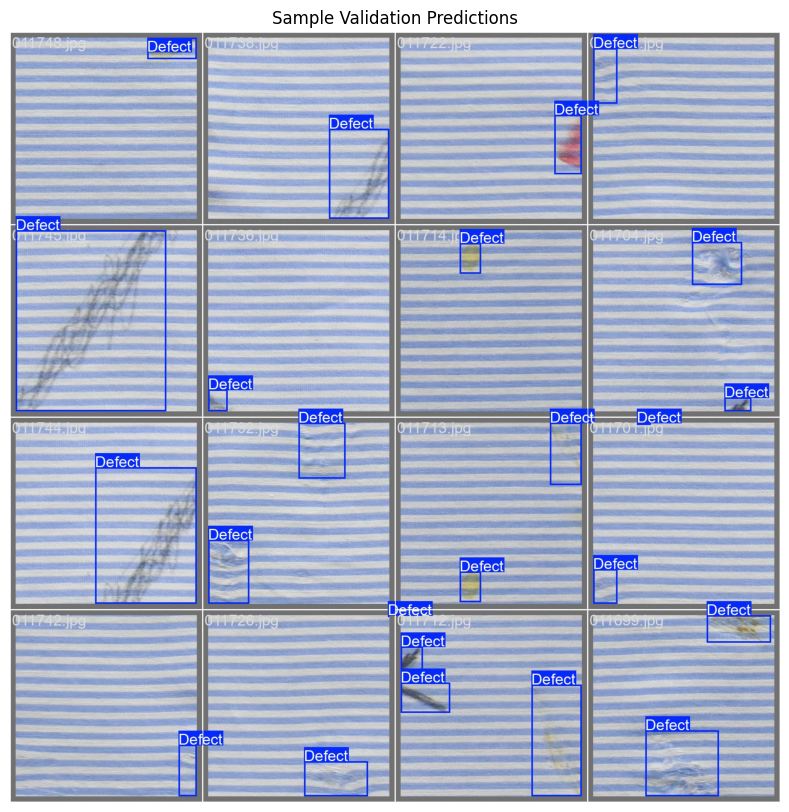

In [ ]:
# @title
import matplotlib.pyplot as plt
import cv2

# Path to results folder
results_path = '/content/runs/detect/yolov8n_colab_run_b64/'

# Show "Train vs. Test" Graphs
img = cv2.imread(results_path + 'results.png')
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Training & Validation Metrics Over Time')
plt.axis('off')
plt.show()

# Show the Confusion Matrix
img_cm = cv2.imread(results_path + 'confusion_matrix.png')
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_cm, cv2.COLOR_BGR2RGB))
plt.title('Confusion Matrix (Validation Set)')
plt.axis('off')
plt.show()

# Show a batch of Validation Results
img_val = cv2.imread(results_path + 'val_batch0_labels.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_val, cv2.COLOR_BGR2RGB))
plt.title('Sample Validation Predictions')
plt.axis('off')
plt.show()

In [ ]:
# @title
# Make sure the destination folder exists
!mkdir -p "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results/"

# Copy to drive
!cp -r /content/runs/detect/yolov8n_colab_run_b64 "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results_Oversampling/"

print("Copy complete!")

cp: cannot stat '/content/runs/detect/yolov8n_colab_run_b64': No such file or directory
Copy complete!


# **Model Training YOLOv11n**

In [ ]:
from ultralytics import YOLO

# Path to YAML file
yaml_path = '/content/fabric_dataset/fabric_data.yaml'

# Load the model
model = YOLO('yolo11n.pt')

# Start training
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=512,
    batch=64,
    name='yolov11n_balance_run'
)

print("Training complete!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fabric_dataset/fabric_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=

In [ ]:
# Make sure the destination folder exists
!mkdir -p "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results/"

# Copy to drive
!cp -r /content/runs/detect/yolov11n_balance_run "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results_Oversampling_v11/"

print("Copy complete!")

Copy complete!


# **Model Training YOLOv8s**

In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8s.pt')

results = model.train(
    data='/content/fabric_dataset/fabric_data.yaml',
    epochs=50,
    imgsz=512,
    batch=32,
    name='yolov8s_balanced_run'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fabric_dataset/fabric_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=

In [ ]:
# Make sure the destination folder exists
!mkdir -p "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results/"

# Copy to drive
!cp -r /content/runs/detect/yolov8s_balanced_run "/content/drive/My Drive/EEY9536 Data Science Project/Dataset/YOLO_Results_Oversampling_v8s/"

print("Copy complete!")

Copy complete!
